In [8]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [9]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
Trans=pd.read_excel("KPMG.xlsx",sheet_name="Transactions")
Trans = Trans.loc[:, ~Trans.columns.str.contains('^Unnamed')]
Trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [10]:
# in ra info bảng
Trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# describe default
Trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [12]:
# describe các biến object
Trans.describe(include=[object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [13]:
#describe all
Trans.describe(include="all")


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [14]:
# count số dòng bị null ở mỗi cột
Trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [15]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all=Trans.dropna()
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [16]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order=Trans["online_order"].dropna()
df_dropna_online_order=pd.DataFrame(df_dropna_online_order)
df_dropna_online_order.info()

# Feedback: Để dropna của 1 cột, mình dùng biến subset bên trong hàm dropna()
# df_dropna_online_order = df.dropna(subset = ['online_order'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 1 columns):
online_order    19640 non-null float64
dtypes: float64(1)
memory usage: 306.9 KB


## 1.2 Fill NA

In [17]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0=Trans.fillna(0)

In [18]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill=Trans.fillna(method="ffill")

In [19]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill=Trans.fillna(method="bfill")

## 1.3. Assess Categorial Data

In [20]:
# load sheet Demographic và hiển thị top head
Degra=pd.read_excel("KPMG.xlsx",sheet_name="CustomerDemographic")


In [21]:
# in ra info bảng 
Degra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [22]:
# describe các giá trị object
Degra.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Timmie,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [23]:
# Remove all NA row
Degra.dropna()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0
11,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,nil,No,8.0
12,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,N,-100,Yes,8.0
13,14,Rayshell,Kitteman,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,â°â´âµ,No,6.0
14,15,Erroll,Radage,Male,91,2000-07-13,Junior Executive,Manufacturing,Mass Customer,N,ð,No,1.0
18,19,Sorcha,Keyson,Female,76,2001-04-15,Geological Engineer,Manufacturing,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0


In [24]:
# In ra các giá trị unique của cột gender
Degra.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [25]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
Degra["gender"]=Degra["gender"].replace(["M","F","U","Femal"],["Male","Female","Unisex","Female"])

In [26]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
Degra.gender.unique()

array(['Female', 'Male', 'Unisex'], dtype=object)

In [45]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
Degra_DOB=Degra.dropna(subset=["DOB"])
import pandas as pd
from datetime import datetime
today = datetime.today()
Degra_DOB['age'] = Degra_DOB['DOB'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )
bins=[0,36,55,110]
labels=["Young","Middle","Older"]
Degra_DOB["Age_Group"]=pd.cut(Degra_DOB["age"],bins=bins,labels=labels,right=True)
print('min age:', Degra_DOB['age'].min())
print('max age:', Degra_DOB['age'].max())

min age: 19
max age: 177


/Users/ngovinh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngovinh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# 2. Data Completeness

In [28]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic


In [29]:
Degra_Trans=Degra.merge(Trans,how="left",on="customer_id")
Degra_Trans

#Feedback: Để tìm ra những customer có trong bảng transaction mà bị miss bên bảng demographic thì ta phải dùng Trans left join Degra. Em đang bị làm ngược.


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
5,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0
9,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0


In [46]:
Degra_Trans[Degra_Trans["transaction_id"].isna()]

#Trường hợp này anh muốn in ra những customer mà có trong data sale mà ko có trong bảng demographic.
# Nếu data chuẩn thì tất cả khách hàng ở data sale phải được reflect trong bảng demographic

# Degra_Trans[Degra_Trans["first_name"].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Gross_Margin


# 3. Data Aggregation

In [31]:
# tính tổng khách hàng bằng hàm nunique
Degra_Trans["first_name"].nunique()

3139

In [32]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
Total_customer_per_month=Degra_Trans.groupby(pd.Grouper(key='transaction_date', axis=0, 
                      freq='M'))["first_name"].nunique()
Total_customer_per_month

transaction_date
2017-01-31    1245
2017-02-28    1195
2017-03-31    1226
2017-04-30    1197
2017-05-31    1211
2017-06-30    1182
2017-07-31    1240
2017-08-31    1251
2017-09-30    1165
2017-10-31    1284
2017-11-30    1205
2017-12-31    1230
Name: first_name, dtype: int64

In [33]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
Degra_Trans["Gross_Margin"]=Degra_Trans["list_price"]-Degra_Trans["standard_cost"]
Gross_margin_per_month=Degra_Trans.groupby(pd.Grouper(key='transaction_date', axis=0, 
                      freq='M'))["Gross_Margin"].sum()
Gross_margin_per_month

transaction_date
2017-01-31    929322.50
2017-02-28    870819.06
2017-03-31    879243.40
2017-04-30    904691.31
2017-05-31    913742.61
2017-06-30    859571.55
2017-07-31    938619.29
2017-08-31    970452.52
2017-09-30    862290.49
2017-10-31    984869.22
2017-11-30    924938.46
2017-12-31    891454.07
Name: Gross_Margin, dtype: float64

In [34]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
sum_order_gross=Degra_Trans.groupby(["online_order","order_status"])["online_order","Gross_Margin"].agg(["sum"])
sum_order_gross

online_order Gross_Margin
                                   sum          sum
online_order order_status                          
0.0          Approved              0.0   5344699.42
             Cancelled             0.0     42930.74
1.0          Approved           9732.0   5287679.96
             Cancelled            97.0     53236.73

# 4. Data Visualization

In [35]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import matplotlib.pyplot as plt
import seaborn as sns
Degra_Trans



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Gross_Margin
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87
5,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,709.34
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,75.75
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0,57.73
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33
9,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,75.14


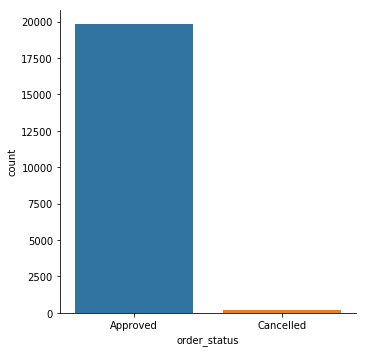

In [36]:
sns.catplot(x="order_status",data=Degra_Trans,kind="count")


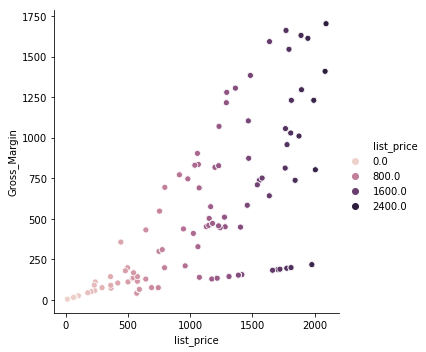

In [37]:
sns.relplot(x="list_price",y="Gross_Margin",data=Degra_Trans,kind="scatter",hue="list_price")

In [38]:
Total_customer_per_month_df=pd.DataFrame(Total_customer_per_month).rename(columns={"first_name":"Total"})
Total_customer_per_month_df=Total_customer_per_month_df.reset_index()
Total_customer_per_month_df

,transaction_date,Total
0,2017-01-31,1245
1,2017-02-28,1195
2,2017-03-31,1226
3,2017-04-30,1197
4,2017-05-31,1211
5,2017-06-30,1182
6,2017-07-31,1240
7,2017-08-31,1251
8,2017-09-30,1165
9,2017-10-31,1284


/Users/ngovinh/anaconda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


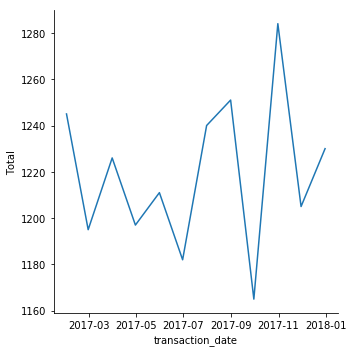

In [39]:
sns.relplot(x="transaction_date",y="Total",data=Total_customer_per_month_df,kind="line")

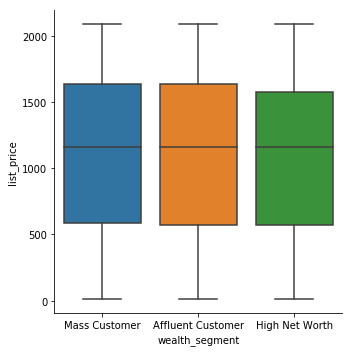

In [40]:
sns.catplot(x="wealth_segment",y="list_price",kind="box", data=Degra_Trans)

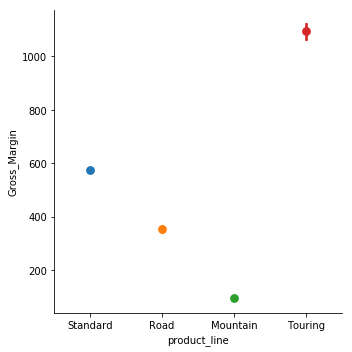

In [41]:
sns.catplot(x="product_line",y="Gross_Margin",kind="point", data=Degra_Trans,hue="product_line")